# **Лабораторная забота №2.**  

## **Статистическое  моделирование  случайных  величин. Интервальное  оценивание  параметров  распределения случайных величин.** 

## **Часть I**

## **Вариант 8**

### 1.  Смоделировать  выборку из   п  независимых наблюдений  над случайной  величиной  X, имеющей нормальный закон распределения с параметрами (a, σ^2).

In [233]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy as sci
import scipy.stats as st
import seaborn as sns
from scipy.stats import t
from scipy.stats import norm, skew, kurtosis

In [234]:
n = 14
a = -0.5
sigma = 2
gamma = 0.95

In [235]:
x = np.random.normal(a, sigma, size=n)

### 1.1.  С надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что  дисперсия случайной величины X известна

In [236]:
P_=1/2+gamma/2
t_gamma=st.norm.ppf(P_, loc=0, scale=1)
a_left_ =x.mean()-sigma*t_gamma/n**0.5
a_right_=x.mean()+sigma*t_gamma/n**0.5
print('Доверительный интервал для параметра a:')
print(a_left_,a_right_)

Доверительный интервал для параметра a:
-1.2948193518263929 0.8004702826208017


In [237]:
a_estimate=np.mean(x)
interval_estimate_1=st.norm.interval(confidence=gamma, 
              loc=a_estimate,
              scale=sigma/np.sqrt(n)) 
print('Доверительный интервал для параметра a:')
print(interval_estimate_1)

Доверительный интервал для параметра a:
(-1.2948193518263929, 0.8004702826208017)


### 1.2. С надежностью  найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [238]:
interval_for_MX_ = [0]*2 
t_gamma_0 = st.t.ppf(1/2+gamma/2, df = len(x) - 1)
print(t_gamma_0)
a_estimate = np.mean(x)
sigma_estimate = np.std(x, ddof=1)
interval_for_MX_[0] = a_estimate-sigma_estimate*t_gamma_0/np.sqrt(n)
interval_for_MX_[1] = a_estimate+sigma_estimate*t_gamma_0/np.sqrt(n)
print(interval_for_MX_)

2.1603686564610127
[-1.4979549531189653, 1.0036058839133741]


In [239]:
interval_estimate_2 = st.t.interval(confidence = gamma, df=len(x) - 1,
              loc=a_estimate,
              scale=st.sem(x, ddof=1)) 
print(interval_estimate_2) 
print(st.sem(x, ddof=1), sigma_estimate / np.sqrt(n))

(-1.4979549531189653, 1.0036058839133741)
0.5789661939296619 0.5789661939296619


### 2. Построить график зависимости длины доверительного интервала от надежности при неизменном объеме выборки для случаев интервального оценивания  математического ожидания и дисперсии. 

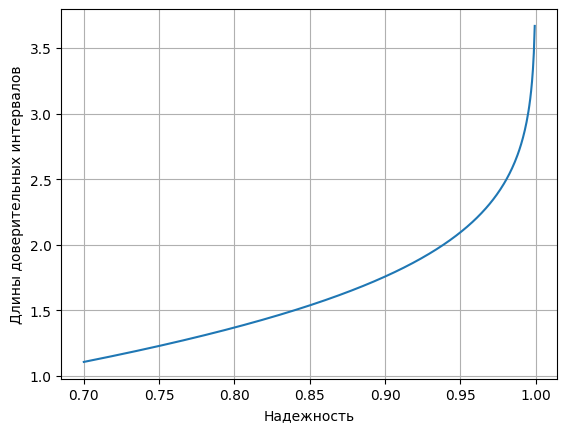

In [240]:
sample = np.random.normal(a, sigma, n)
a_estimate = np.mean(sample) 
V = 500
gamma_ = [0.0] * V 
delta_ = [0.0] * V
gamma__0 = 0.7
gamma__1 = 0.9999999999
h = (gamma__1 - gamma__0) / V
for i in range(V):
    gamma_[i] = gamma__0 + i * h
    interval_estimate_MX=st.norm.interval(confidence=gamma_[i], 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n)) 
    delta_[i] = interval_estimate_MX[1] - interval_estimate_MX[0]
plt.plot(gamma_,delta_)
plt.xlabel("Надежность")
plt.ylabel("Длины доверительных интервалов")
plt.grid()

### 3. Построить график зависимости длины доверительного интервала от объема выборки при неизменной надежности для случаев интервального оценивания математического ожидания и дисперсии.

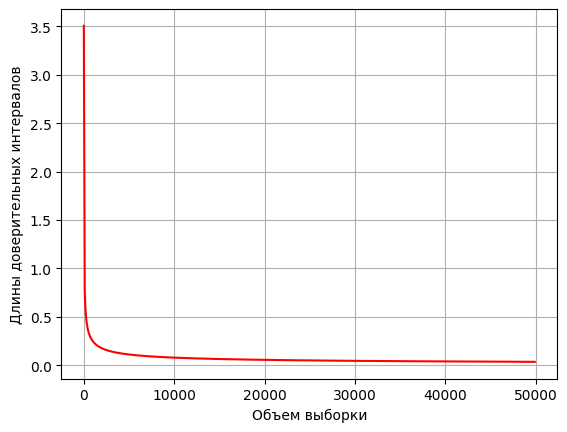

In [241]:
sample = np.random.normal(a, sigma, n)
a_estimate=np.mean(sample)
#################################
V=500
### массив gamma_ будет содержать V значений надежности
n_=[0.0]*V
### массив delta_ будет содержать V значений длин доверительных интервалов, отвечающих соответствующим надежностям
delta_=[0.0]*V
n__0=5
n__1=50000
h=(n__1-n__0)/V
for i in range(V):
    n_[i]=n__0+i*h
    interval_estimate_MX=st.norm.interval(gamma, 
              loc=a_estimate, 
              scale=sigma/np.sqrt(n_[i])) 
    delta_[i]=interval_estimate_MX[1]-interval_estimate_MX[0]
###print(delta_)
plt.xlabel("Объем выборки")
plt.ylabel("Длины доверительных интервалов")
plt.plot(n_,delta_, color='red')
plt.grid()

### 4. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2). По каждой из M выборок с надежностью γ найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X неизвестна.

In [242]:
V=150 ### число точечных оценок надежности gamma=0.95
M=1800 ### число интервальных оценок
a = -0.5
sigma = 2
################################
t_gamma=2.50
COUNT_=[0]*V
P_hat=[0.0]*V
a_left=[0.0]*M
a_right=[0.0]*M
for j in range(V):
    for i in range(M):
        X= np.random.normal(a,sigma,size = n)
        S=np.std(X,ddof=1)
        a_left[i] =X.mean()-S*t_gamma/n**0.5
        a_right[i]=X.mean()+S*t_gamma/n**0.5
    s0=pd.Series(data=a_left)
    ##print(s0)
    s1=pd.Series(data=a_right)
    COUNT_[j]=((s0<a)&(s1>a)).sum()
    P_hat[j]=COUNT_[j]/M
print(P_hat)

[0.9794444444444445, 0.9727777777777777, 0.9727777777777777, 0.9744444444444444, 0.9727777777777777, 0.9722222222222222, 0.9727777777777777, 0.97, 0.9761111111111112, 0.9705555555555555, 0.9738888888888889, 0.9777777777777777, 0.9661111111111111, 0.9744444444444444, 0.9688888888888889, 0.9783333333333334, 0.9688888888888889, 0.9766666666666667, 0.9688888888888889, 0.9744444444444444, 0.9694444444444444, 0.9783333333333334, 0.9711111111111111, 0.9738888888888889, 0.9733333333333334, 0.9711111111111111, 0.9711111111111111, 0.9772222222222222, 0.9744444444444444, 0.9688888888888889, 0.9711111111111111, 0.975, 0.9705555555555555, 0.9772222222222222, 0.975, 0.9788888888888889, 0.9694444444444444, 0.9672222222222222, 0.9683333333333334, 0.9733333333333334, 0.9733333333333334, 0.9766666666666667, 0.9772222222222222, 0.9711111111111111, 0.9772222222222222, 0.9661111111111111, 0.9705555555555555, 0.9744444444444444, 0.9744444444444444, 0.98, 0.9738888888888889, 0.9716666666666667, 0.97666666666

In [243]:
confidence_intervals = []
hits =0 
for _ in range(M):
    X= np.random.normal(a,sigma,size = n)
    S=np.std(X,ddof=1)
    lower_bound =X.mean()-S*t_gamma/n**0.5
    upper_bound=X.mean()+S*t_gamma/n**0.5
    confidence_intervals.append((lower_bound, upper_bound))
    if lower_bound <= a <= upper_bound:
            hits += 1
gamma_star = hits / M
print(f"Точечная оценка реальной надежности: gamma* = {gamma_star:.4f}")
print(f"Доверительные интервалы для каждой из М выборок: {confidence_intervals}" )

Точечная оценка реальной надежности: gamma* = 0.9767
Доверительные интервалы для каждой из М выборок: [(-0.7863012947625384, 1.8169682961084161), (-1.6421892575458745, 1.1060161588072517), (-1.6723814440325326, 1.2335572248884454), (-0.6885888364019934, 1.3586573341384904), (-1.4167093005147378, 1.088568526406439), (-1.6600838937634634, 1.409720530602105), (-1.5225764481204023, 1.2035522363964468), (-1.2803755074056555, 0.3369442839069851), (-2.0621562241426963, 1.2842474489368736), (-1.9383824419692217, 0.2843860679927712), (-1.5917959960842063, 0.84449200371131), (-2.3165944375590426, 0.7250222135123028), (-2.0507923896948324, 0.2868035560014399), (-1.492055714152749, 0.7859278140456754), (-2.15614823676473, 0.22380468371979123), (-2.393778197329402, 0.37071505834741414), (-1.1908529578075124, 1.9083052268855791), (-1.9986130444458918, 1.5348514669137472), (-2.505873255019095, 0.4709707040226869), (-1.633284479012088, 0.10729511767726707), (-2.0841429861978646, 0.9719939221854285), (

In [244]:
print(np.mean(P_hat),np.std(P_hat,ddof=1))

0.9731666666666668 0.0035898963823661543


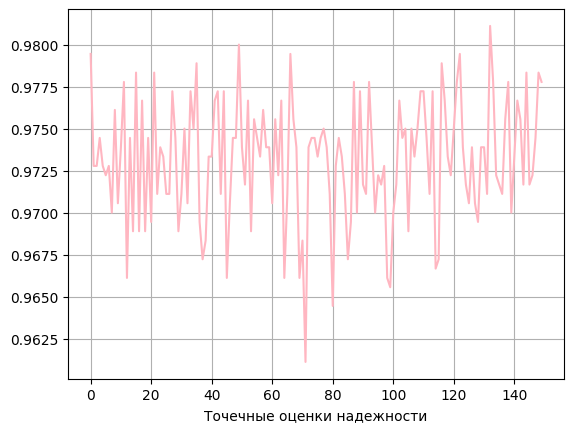

In [245]:
plt.xlabel("Точечные оценки надежности") 
plt.plot(P_hat, color='lightpink')
plt.grid()

### 5. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,σ2).

### 5.1. По каждой из M выборок найти наблюдаемое значение случайной величины Z (описание случайной величины Z приведено в Вашем варианте)

In [256]:
M = 1800
n = 14
a = -0.5
sigma = 2
z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size =n)
    x_bar = np.mean(X)
    S2 = np.std(X, ddof=1) 
    Z = ((x_bar - a) / S2) * np.sqrt(n)
    z_values.append(Z)
print("Наблюдаемые значения:")
print(z_values)

Наблюдаемые значения:
[-0.7749806646499495, -0.8003500105290627, 0.4126101714447774, 2.0404256346241647, -0.45418570711960954, 1.022324773826752, -0.6794114771606707, 1.697932428679146, -0.6876815000882703, 0.626973752413545, 0.29143420853075785, 0.0019217906825804735, 1.113623920163863, -0.3135147262973596, 1.0775272451378775, 1.0928977245129514, 0.6997405199201496, 2.2187232490695816, 0.7744552351281204, 0.4483841657743132, 1.214252891884326, -0.7668499934671105, -1.4517101535269574, -1.4366922066320515, 1.5777079354197332, -1.4276183228191552, -0.2648025219777865, 1.02491902700908, 0.6475599250902099, 0.3276774747023243, 0.12788119471070747, -1.2329879925685185, 1.2206317480341402, -0.515203072671187, -0.35036783239648034, 0.23384271489712868, -0.46484607761946317, -0.4275074032788774, -0.4080376187866352, 0.4770711868821632, 1.3445487032782832, -0.9148830657565594, 0.8994375216265865, -0.5507716668187799, -0.4618197610090414, -0.03791256626888693, -0.017739100726104344, -1.05629513

### 5.2. По выборке из M значений случайной величины Z найти выборочные числовые характеристики ее распределения.

In [257]:
mean_z = np.mean(z_values)
median_z = np.median(z_values)
var_z = np.var(z_values, ddof=1)
skew_z = skew(z_values)
kurtosis_z = kurtosis(z_values)

print("Выборочные характеристики:")
print(f"Среднее: {mean_z}")
print(f"Медиана: {median_z}")
print(f"Дисперсия: {var_z}")
print(f"Асимметрия: {skew_z}")
print(f"Эксцесс: {kurtosis_z}")


Выборочные характеристики:
Среднее: 0.010864341060967127
Медиана: 0.0030420458198978343
Дисперсия: 1.245535407452038
Асимметрия: -0.00911926863881259
Эксцесс: 0.5691276256839344


### 5.3. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Z, а также ящичковую диаграмму.

In [258]:
h = (sigma*sigma * 3.5) / (np.cbrt(M))
print(f"h = ", h)

min_data = np.min(z_values)
max_data = np.max(z_values)
bins = np.arange(min_data, max_data+h, h) 
k_bins = round(abs(min_data - max_data)/h)
print(bins)
print(k_bins)

h =  1.1508989680208863
[-4.16844764 -3.01754867 -1.8666497  -0.71575073  0.43514824  1.5860472
  2.73694617  3.88784514  5.03874411]
7


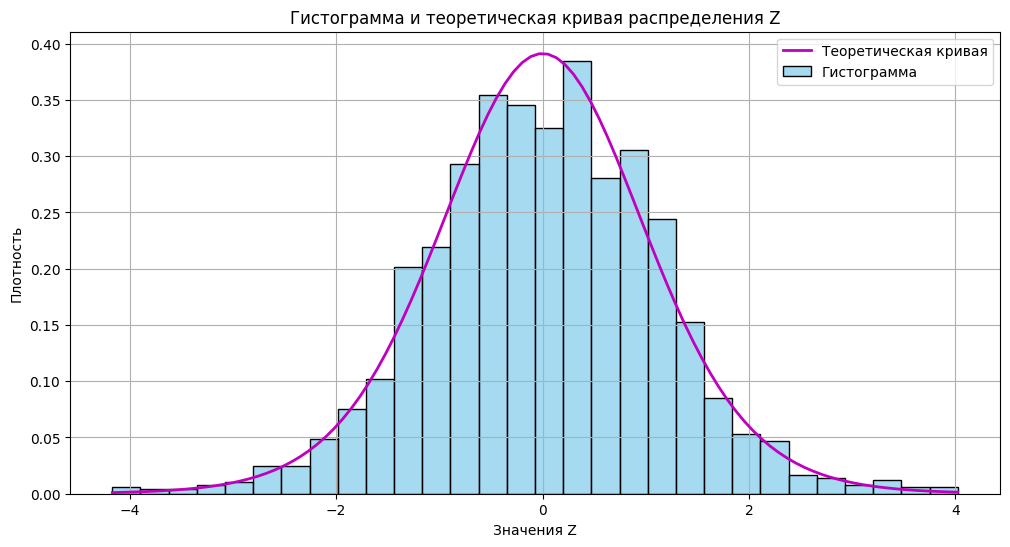

In [260]:
plt.figure(figsize=(12, 6))
sns.histplot(z_values, bins=30, kde=False, stat='density', color='skyblue', label='Гистограмма')

# Теоретическая кривая распределения 
y = np.linspace(min_data, max_data, 100)
p = t.pdf(y, 13)
plt.plot(y, p, 'm', linewidth=2, label='Теоретическая кривая')

plt.title('Гистограмма и теоретическая кривая распределения Z')
plt.xlabel('Значения Z')
plt.ylabel('Плотность')
plt.legend()
plt.grid()

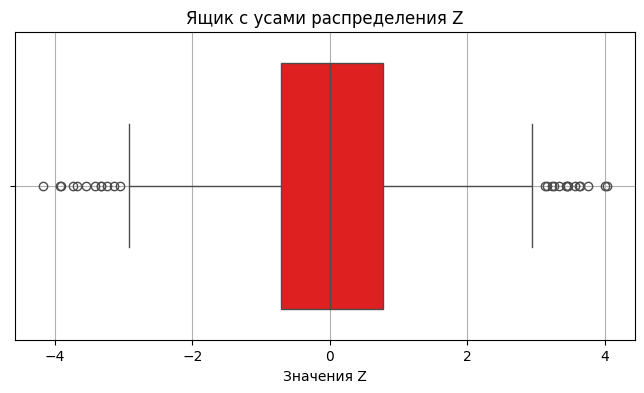

In [261]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=z_values, color="red")
plt.title('Ящик с усами распределения Z')
plt.xlabel('Значения Z')
plt.grid()

# Распределение t-Стьюдента

## **Часть II**

### 1. Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a,sigma2). По каждой из M выборок с надежностью gamma найти интервальную оценку (доверительный интервал) для дисперсии случайной величины X. 